In [3]:
import numpy as np
import pandas as pd
import scipy.stats

pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt, rcParams
# import cv2
import seaborn as sns

sns.set(style="white", context="paper")
from cycler import cycler
import os, sys
import glob
from datetime import datetime, timedelta
from itertools import combinations, product
import base64
from PIL import Image
from io import BytesIO as _BytesIO
import requests
import json
import pickle
from datetime import datetime
from IPython.display import display, Markdown, Latex
from sklearn.metrics import *
import collections
from copy import deepcopy
import traceback
from sympy import Point, Polygon
from decorators import *
from smartprint import smartprint as sprint
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
# import plotly
# from pandas_profiling import ProfileReport

pd.options.display.max_columns = None
def printm(s): return display(Markdown(s))
    
SERVER_CACHE_DIR = '/mnt/ci-nas-cache/edulyzeV2/cache_compute_4/fixed_face'
os.makedirs(SERVER_CACHE_DIR,exist_ok=True)

track_analysis_meta_cache = f'{SERVER_CACHE_DIR}/analysis_tracking/meta_info'
base_dir = '/mnt/ci-nas-cache/edulyzeV2/pose_face_gaze_emb_fixed_face/'

track_analysis_session_data = f'{SERVER_CACHE_DIR}/analysis_tracking/session_tracking_info'
os.makedirs(track_analysis_session_data,exist_ok=True)

postprocessed_id_map_data_dir = f'{SERVER_CACHE_DIR}/analysis_tracking/processed_id_maps'
os.makedirs(postprocessed_id_map_data_dir, exist_ok=True)

emb_analysis_session_data = f'{SERVER_CACHE_DIR}/analysis_emb/session_emb_info_new'
os.makedirs(emb_analysis_session_data,exist_ok=True)

embmatched_id_raw_data_dir = f'{SERVER_CACHE_DIR}/analysis_emb/embmatched_id_raw'
os.makedirs(embmatched_id_raw_data_dir,exist_ok=True)

embmatched_id_map_data_dir = f'{SERVER_CACHE_DIR}/analysis_tracking/embmatched_id_maps_new'
os.makedirs(embmatched_id_map_data_dir, exist_ok=True)

in_session_median_embeddings_data_dir = f'{SERVER_CACHE_DIR}/analysis_tracking/in_session_median_embeddings'
os.makedirs(in_session_median_embeddings_data_dir, exist_ok=True)

in_session_cluster_embeddings_data_dir = f'{SERVER_CACHE_DIR}/analysis_tracking/in_session_cluster_embeddings'
os.makedirs(in_session_cluster_embeddings_data_dir, exist_ok=True)

id_viz_cache_root = f'{SERVER_CACHE_DIR}/analysis_tracking/session_matching_info'
os.makedirs(id_viz_cache_root, exist_ok=True)

/home/prasoon/anaconda3/envs/edusense/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
session_filter_list = [
   'classinsight-cmu_05681A_ghc_4301_201905011630',
 'classinsight-cmu_05681A_ghc_4301_201904171630',
 'classinsight-cmu_05681A_ghc_4301_201902201630',
 'classinsight-cmu_05681A_ghc_4301_201904101630',
 'classinsight-cmu_05681A_ghc_4301_201901231630',
 # 'classinsight-cmu_05418A_ghc_4102_201902251200',
 # 'classinsight-cmu_05418A_ghc_4102_201904081200',
 # 'classinsight-cmu_05418A_ghc_4102_201905011200',
 # 'classinsight-cmu_05418A_ghc_4102_201904291200',
 # 'classinsight-cmu_05418A_ghc_4102_201904011200',
 # 'classinsight-cmu_05748A_ghc_4101_201902141630',
 # 'classinsight-cmu_05748A_ghc_4101_201904021630',
 # 'classinsight-cmu_05748A_ghc_4101_201902051630',
 # 'classinsight-cmu_05748A_ghc_4101_201902281630',
 # 'classinsight-cmu_05748A_ghc_4101_201903071630',
 # 'classinsight-cmu_21127J_ghc_4102_201904230930',
 # 'classinsight-cmu_21127J_ghc_4102_201903260930',
 # 'classinsight-cmu_21127J_ghc_4102_201904160930',
 # 'classinsight-cmu_21127J_ghc_4102_201904300930',
 # 'classinsight-cmu_21127J_ghc_4102_201903190930',
 # 'classinsight-cmu_05410A_ghc_4301_201904151500',
 # 'classinsight-cmu_05410A_ghc_4301_201902251500',
 # 'classinsight-cmu_05410A_ghc_4301_201904081500',
 # 'classinsight-cmu_05410A_ghc_4301_201904221500',
 # 'classinsight-cmu_05410A_ghc_4301_201902181500',
                       
 # 'classinsight-cmu_17214B_ph_a21_201902271030',
 # 'classinsight-cmu_17214B_ph_a21_201903061030',
 # 'classinsight-cmu_17214B_ph_a21_201904031030',
 # 'classinsight-cmu_17214B_ph_a21_201904101030',
 # 'classinsight-cmu_17214B_ph_a21_201904241030',
 # 'classinsight-cmu_17214C_ph_225b_201903201130',
 # 'classinsight-cmu_17214C_ph_225b_201904101130',
 # 'classinsight-cmu_17214C_ph_225b_201904171130',
 # 'classinsight-cmu_17214C_ph_225b_201904241130',
 # 'classinsight-cmu_17214C_ph_225b_201905011130',
 'classinsight-cmu_05410B_ghc_4211_201902111500',
 'classinsight-cmu_05410B_ghc_4211_201903181500',
 'classinsight-cmu_05410B_ghc_4211_201904081500',
 'classinsight-cmu_05410B_ghc_4211_201904151500',
 'classinsight-cmu_05410B_ghc_4211_201904221500',
 'classinsight-cmu_05410B_ghc_4211_201901281500'
]

## Get embedding and gaze information for all frames for all sessions (Run if needed, commented out for now)?

## Get frame file data for all sessions

In [5]:

frame_file_data = {}
for course_idx, course_dir in enumerate(glob.glob(f"{base_dir}/*")):
    course_name = course_dir.split("/")[-1]
    course_cache_file = f"{track_analysis_meta_cache}/{course_name}"
    if os.path.exists(course_cache_file):
        frame_file_data[course_name] = pickle.load(open(course_cache_file,"rb"))
        continue
    frame_file_data[course_name]={}
        
    for session_idx, session_dir in enumerate(glob.glob(f"{course_dir}/*")):
        session_name = session_dir.split("/")[-1]
        frame_file_data[course_name][session_name] = {}
        frame_files = glob.glob(f"{session_dir}/*")
        frame_file_names = [xr.split("/")[-1] for xr in frame_files]
        if 'end.pb' in frame_file_names:
            frame_file_data[course_name][session_name]['is_completed']=True
        else:
            frame_file_data[course_name][session_name]['is_completed']=False            
        frame_ids = [int(xr.split(".")[0]) for xr in frame_file_names if not (xr=='end.pb')]
        frame_file_data[course_name][session_name]['frame_ids'] = sorted(frame_ids)
        frame_file_data[course_name][session_name]['dir_location'] = session_dir
        print(f"Got metadata for course: {course_idx}-{course_name}, session:{session_idx}-{session_name}")
    pickle.dump(frame_file_data[course_name],open(course_cache_file,"wb")) 
        
        
frame_file_data.keys()

dict_keys(['05748A', '05410B', '17214C', '17214B', '05681A', '24352A', '24352C', '86375A'])

In [6]:
# writing a generic loop to get embedding info from all courses in frame file data

for course_idx, course in enumerate(frame_file_data):
    for session_idx, session_id in enumerate(frame_file_data[course]):
        if session_id.split("-front")[0] not in session_filter_list:
            print(f"Session {session_id} not in session filter list, skipping...")
            continue
        session_emb_cache_file = f"{emb_analysis_session_data}/{session_id}.pb"
        try:
            if not os.path.exists(session_emb_cache_file):
                session_dir = frame_file_data[course][session_id]['dir_location']
                frame_ids = frame_file_data[course][session_id]['frame_ids']
                session_emb_info = {}
                for frame_id in frame_ids:
                    frame_number, frame_data = pickle.load(open(f'{session_dir}/{frame_id}.pb','rb'))
                    frame_emb_info = {int(person_info['track_id']):{
                        'bbox': person_info['bbox'] if 'bbox' in person_info else None,
                        'rvec': person_info['rvec'] if 'rvec' in person_info else None,
                        'face': person_info['face'] if 'face' in person_info else None,
                        'gaze_2d':person_info['gaze_2d'] if 'gaze_2d' in person_info else None,
                        'face_embedding': person_info['face_embedding'] if 'face_embedding' in person_info else None,
                    } for person_info in frame_data}
                    session_emb_info[frame_id] = frame_emb_info
                pickle.dump(session_emb_info, open(session_emb_cache_file,'wb'))
                print(f"Got emb info for session: {course_idx}-{course}, session:{session_idx}-{session_id}")
            else:
                ...
                print(f"FILE EXISTS: emb info for session: {course_idx}-{course}, session:{session_idx}-{session_id}")
        except:
            print(f"ERROR: Unable to get session emb for: {course_idx}-{course}, session:{session_idx}-{session_id}")
            unfinished_sessions.append((course, session_id))
            print(traceback.format_exc())
    

Session classinsight-cmu_05748A_ghc_4101_201902051630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902141630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201901291630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201901311630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902071630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902121630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902191630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902211630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902281630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201903051630-front not in session filter list, skipping...


## Compile information from session embeddings and postprocessed id maps to get in-session id maps

In [7]:
def is_overlapping_metric(bu, bv, eps_fraction=0.1):
    X_TL1, Y_TL1, X_BR1, Y_BR1 = bu[:4]
    X_TL2, Y_TL2, X_BR2, Y_BR2 = bv[:4]
    eps_distance = min(X_BR1-X_TL1, X_BR2-X_TL2, Y_BR1-Y_TL1, Y_BR2-Y_TL2)*eps_fraction
    # if rectangle has area 0, no overlap
    if X_TL1 == X_BR1 or Y_TL1 == Y_BR1 or X_TL2 == X_BR2 or Y_TL2 == Y_BR2:
        return False
     
    # If one rectangle is on left side of other
    if X_TL1 > X_BR2-eps_distance or X_TL2 > X_BR1-eps_distance:
        return False
 
    # If one rectangle is above other
    if Y_TL1 > Y_BR2 - eps_distance or Y_TL2 > Y_BR1 - eps_distance:
        return False
 
    return True

Session classinsight-cmu_05748A_ghc_4101_201902051630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902141630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201901291630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201901311630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902071630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902121630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902191630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902211630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201902281630-front not in session filter list, skipping...
Session classinsight-cmu_05748A_ghc_4101_201903051630-front not in session filter list, skipping...


# -----------------

Session classinsight-cmu_05410B_ghc_4211_201902131500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201902181500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201902201512-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201902251500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201902271500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201903041500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201903111500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201903131500-front not in session filter list, skipping...
FILE EXISTS: embedding based id match for session: 1-05410B, session:12-classinsight-cmu_05410B_ghc_4211_201903181500-front


# -----------------

Session classinsight-cmu_05410B_ghc_4211_201903201500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201903271500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201904031500-front not in session filter list, skipping...
FILE EXISTS: embedding based id match for session: 1-05410B, session:16-classinsight-cmu_05410B_ghc_4211_201904081500-front


# -----------------

Session classinsight-cmu_05410B_ghc_4211_201904101500-front not in session filter list, skipping...
FILE EXISTS: embedding based id match for session: 1-05410B, session:18-classinsight-cmu_05410B_ghc_4211_201904151500-front


# -----------------

Session classinsight-cmu_05410B_ghc_4211_201904171500-front not in session filter list, skipping...
FILE EXISTS: embedding based id match for session: 1-05410B, session:20-classinsight-cmu_05410B_ghc_4211_201904221500-front


# -----------------

Session classinsight-cmu_05410B_ghc_4211_201901211500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201901231500-front not in session filter list, skipping...
FILE EXISTS: embedding based id match for session: 1-05410B, session:23-classinsight-cmu_05410B_ghc_4211_201901281500-front


# -----------------

Session classinsight-cmu_05410B_ghc_4211_201904011500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201904241500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201904291500-front not in session filter list, skipping...
Session classinsight-cmu_05410B_ghc_4211_201905011500-front not in session filter list, skipping...
Session classinsight-cmu_17214C_ph_225b_201903201130-front not in session filter list, skipping...
Session classinsight-cmu_17214C_ph_225b_201904031130-front not in session filter list, skipping...
Session classinsight-cmu_17214C_ph_225b_201904101130-front not in session filter list, skipping...
Session classinsight-cmu_17214C_ph_225b_201904171130-front not in session filter list, skipping...
Session classinsight-cmu_17214C_ph_225b_201904241130-front not in session filter list, skipping...
Session classinsight-cmu_17214C_ph_225b_201905011130-front not in session filter list, skipping...
Sessio

# -----------------

Session classinsight-cmu_05681A_ghc_4301_201902271630-front not in session filter list, skipping...
Session classinsight-cmu_05681A_ghc_4301_201902271718-front not in session filter list, skipping...
Session classinsight-cmu_05681A_ghc_4301_201903131630-front not in session filter list, skipping...
Session classinsight-cmu_05681A_ghc_4301_201903201630-front not in session filter list, skipping...
Session classinsight-cmu_05681A_ghc_4301_201903271630-front not in session filter list, skipping...
Session classinsight-cmu_05681A_ghc_4301_201904031630-front not in session filter list, skipping...
FILE EXISTS: embedding based id match for session: 4-05681A, session:10-classinsight-cmu_05681A_ghc_4301_201904101630-front


# -----------------

FILE EXISTS: embedding based id match for session: 4-05681A, session:11-classinsight-cmu_05681A_ghc_4301_201904171630-front


# -----------------

## Replace raw ids with mapped ids for given session

## arrange info as per new tracking id for entire session

## Get id start stop for given session (needed to evaluate overlap conditions)

## Use spectral clustering to get clean set of embeddings and calculate their centroid

f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 5
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 27
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 43
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 57
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 60
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 61
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 62
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 64
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 69
f"All frames are out

## Evaluate matching distance for temporally non overlapping ids

## Evaluate bbox overlap to filter out spatially overlapping ids

idA, idB, bbox_overlap : 0 79 0.041196
idA, idB, bbox_overlap : 0 80 0.929009
idA, idB, bbox_overlap : 0 81 0.0
idA, idB, bbox_overlap : 0 82 0.943736
idA, idB, bbox_overlap : 0 83 0.069744
idA, idB, bbox_overlap : 0 85 0.0
idA, idB, bbox_overlap : 0 86 0.08592737430167598
idA, idB, bbox_overlap : 0 88 0.055405627198124266
idA, idB, bbox_overlap : 0 90 0.0
idA, idB, bbox_overlap : 1 71 0.753754
idA, idB, bbox_overlap : 1 72 0.016305
idA, idB, bbox_overlap : 1 73 0.012924632352941176
idA, idB, bbox_overlap : 1 74 0.0
idA, idB, bbox_overlap : 1 77 0.0
idA, idB, bbox_overlap : 1 79 0.0
idA, idB, bbox_overlap : 1 80 0.681308
idA, idB, bbox_overlap : 1 81 0.016087
idA, idB, bbox_overlap : 1 82 0.561099
idA, idB, bbox_overlap : 1 83 0.29306
idA, idB, bbox_overlap : 1 85 0.145197
idA, idB, bbox_overlap : 1 86 0.0040480446927374306
idA, idB, bbox_overlap : 1 88 0.0
idA, idB, bbox_overlap : 1 90 0.046852981969486826
idA, idB, bbox_overlap : 3 51 0.0
idA, idB, bbox_overlap : 3 52 0.973348
idA, i

## get eligible pairs from matching and spatial overlap information

## Got embedding based id match for session: 4-05681A, session:12-classinsight-cmu_05681A_ghc_4301_201901231630-front

[(14, 77) (16, 44) (16, 77) (18, 34) (18, 45) (24, 77) (25, 77) (30, 44)
 (31, 44) (31, 55) (36, 44) (36, 55) (36, 45) (40, 44) (42, 55) (47, 55)
 (53, 88) (58, 79) (63, 88) (66, 82) (67, 88) (68, 79)]


# -----------------

Session classinsight-cmu_05681A_ghc_4301_201904241630-front not in session filter list, skipping...


## Replace raw ids with mapped ids for given session

## arrange info as per new tracking id for entire session

## Get id start stop for given session (needed to evaluate overlap conditions)

## Use spectral clustering to get clean set of embeddings and calculate their centroid

f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 18
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 32
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 41
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 45
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 70
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 71
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 76
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 98
f"All frames are outliers, not proceeding with id {id}" : All frames are outliers, not proceeding with id 103
f"All frames are o

## Evaluate matching distance for temporally non overlapping ids

## Evaluate bbox overlap to filter out spatially overlapping ids

idA, idB, bbox_overlap : 0 81 0.023832
idA, idB, bbox_overlap : 0 82 0.0
idA, idB, bbox_overlap : 0 83 0.0
idA, idB, bbox_overlap : 0 85 0.0
idA, idB, bbox_overlap : 0 86 0.0
idA, idB, bbox_overlap : 0 87 0.0
idA, idB, bbox_overlap : 0 88 7e-06
idA, idB, bbox_overlap : 0 89 0.046719
idA, idB, bbox_overlap : 0 90 0.0
idA, idB, bbox_overlap : 0 91 0.061565
idA, idB, bbox_overlap : 0 93 0.0
idA, idB, bbox_overlap : 0 94 0.0
idA, idB, bbox_overlap : 0 95 0.0
idA, idB, bbox_overlap : 0 96 0.0
idA, idB, bbox_overlap : 0 97 0.0
idA, idB, bbox_overlap : 0 100 0.0
idA, idB, bbox_overlap : 0 101 0.534602
idA, idB, bbox_overlap : 0 102 0.009737
idA, idB, bbox_overlap : 0 104 0.0
idA, idB, bbox_overlap : 0 105 0.0
idA, idB, bbox_overlap : 1 85 0.0
idA, idB, bbox_overlap : 1 86 0.0
idA, idB, bbox_overlap : 1 87 0.0
idA, idB, bbox_overlap : 1 88 0.795026
idA, idB, bbox_overlap : 1 89 0.19392
idA, idB, bbox_overlap : 1 90 0.213216
idA, idB, bbox_overlap : 1 91 0.25249
idA, idB, bbox_overlap : 1 93 0.

## get eligible pairs from matching and spatial overlap information

## Got embedding based id match for session: 4-05681A, session:14-classinsight-cmu_05681A_ghc_4301_201905011630-front

[(9, 78) (9, 101) (15, 88) (23, 91) (23, 52) (23, 88) (24, 94) (29, 101)
 (36, 86) (39, 89) (43, 72) (46, 78) (48, 78) (53, 101) (54, 97) (55, 94)
 (58, 85) (59, 67) (63, 101) (64, 94) (66, 100) (69, 97)]


# -----------------

Session classinsight-cmu_24352A_ghc_4211_201902121330-front not in session filter list, skipping...
Session classinsight-cmu_24352A_ghc_4211_201902191330-front not in session filter list, skipping...
Session classinsight-cmu_24352C_ghc_4211_201901291530-front not in session filter list, skipping...
Session classinsight-cmu_24352C_ghc_4211_201902051530-front not in session filter list, skipping...
Session classinsight-cmu_24352C_ghc_4211_201902121530-front not in session filter list, skipping...
Session classinsight-cmu_24352C_ghc_4211_201902191530-front not in session filter list, skipping...
Session classinsight-cmu_24352C_ghc_4211_201902261530-front not in session filter list, skipping...
Session classinsight-cmu_86375A_ghc_4101_201910071325-front not in session filter list, skipping...
Session classinsight-cmu_86375A_ghc_4101_201910141328-front not in session filter list, skipping...


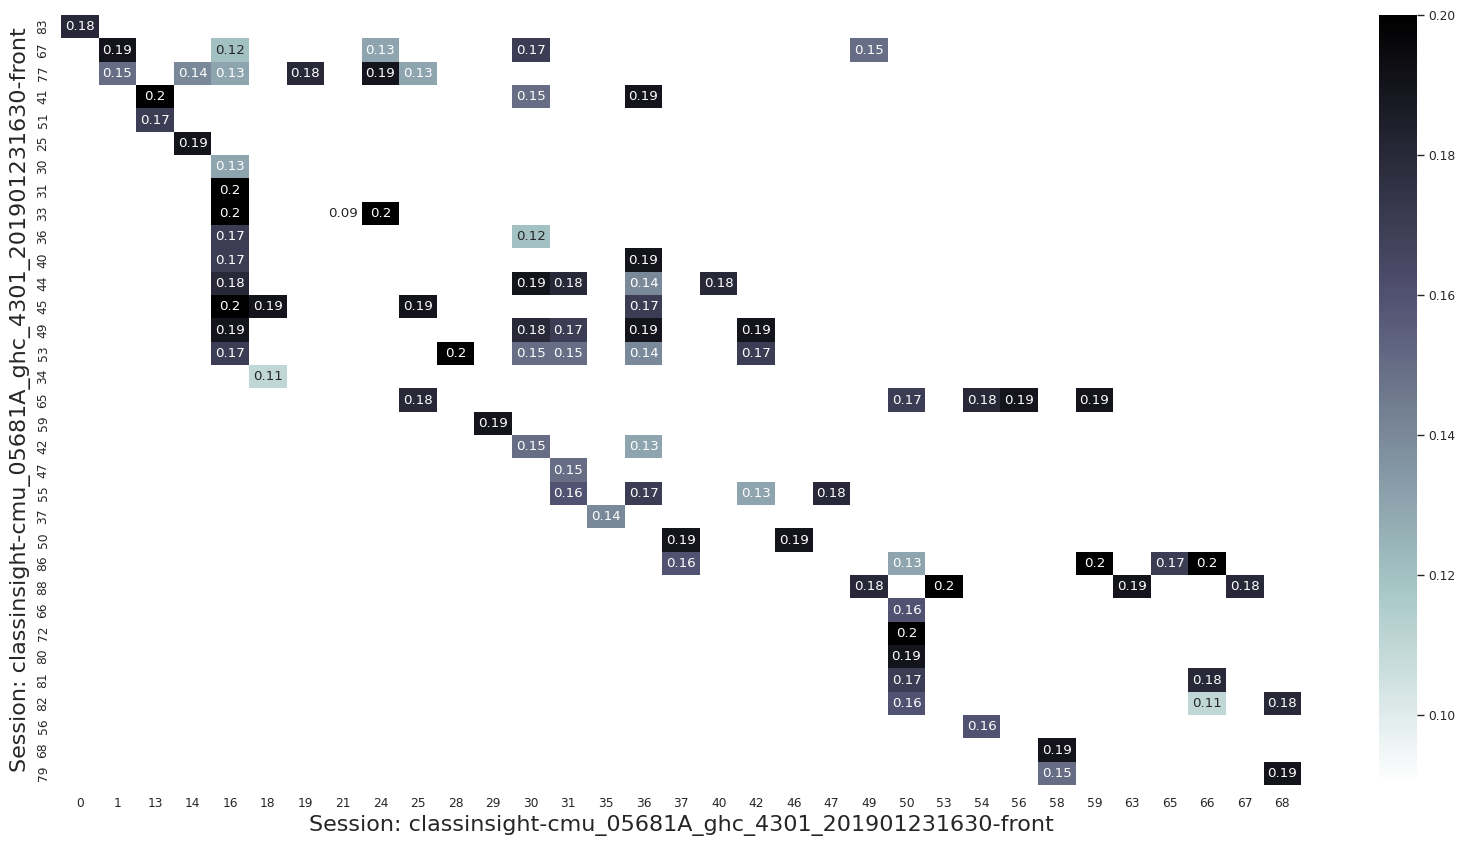

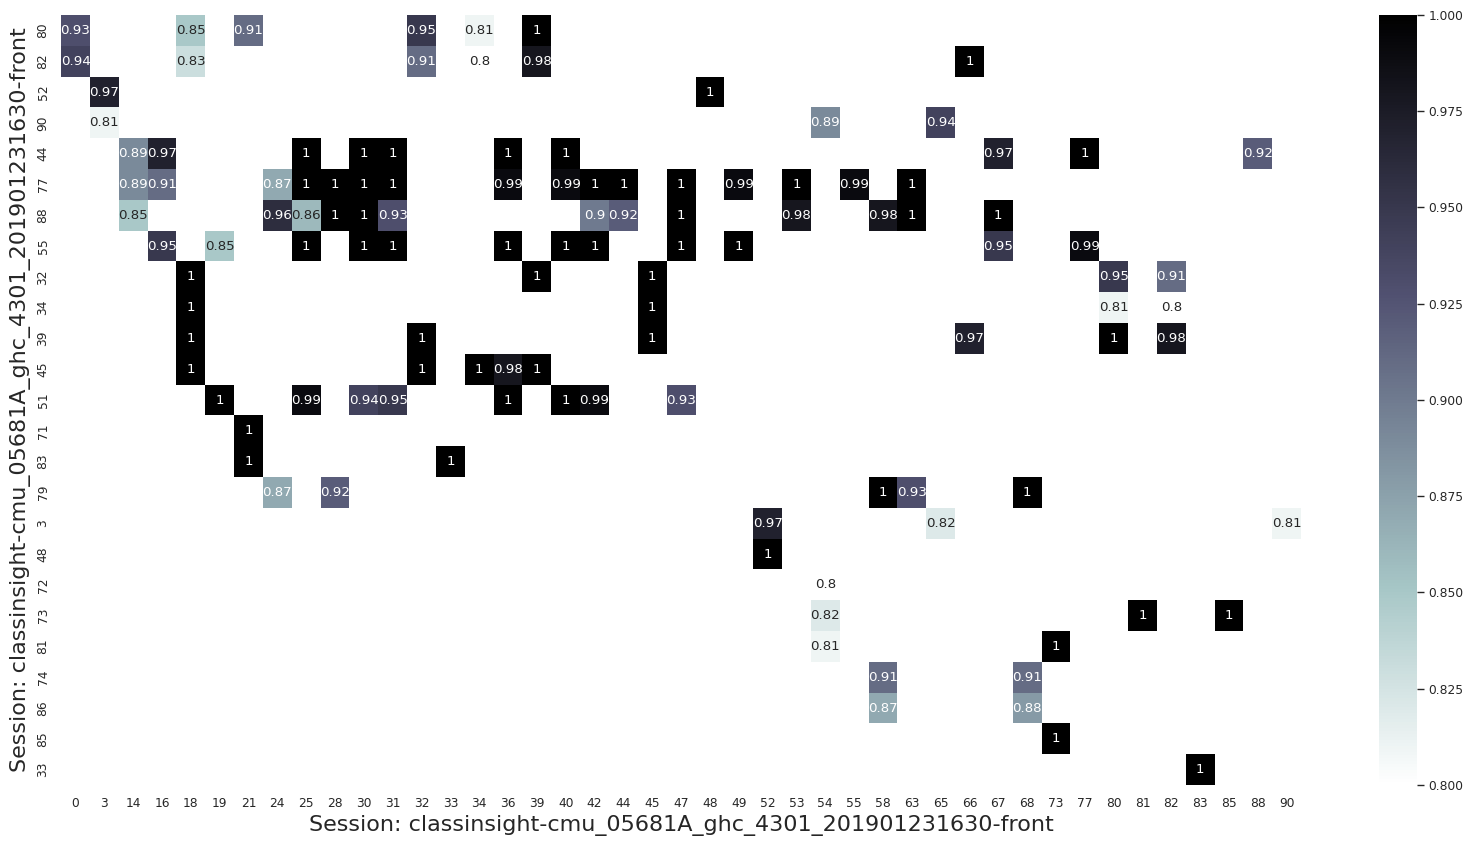

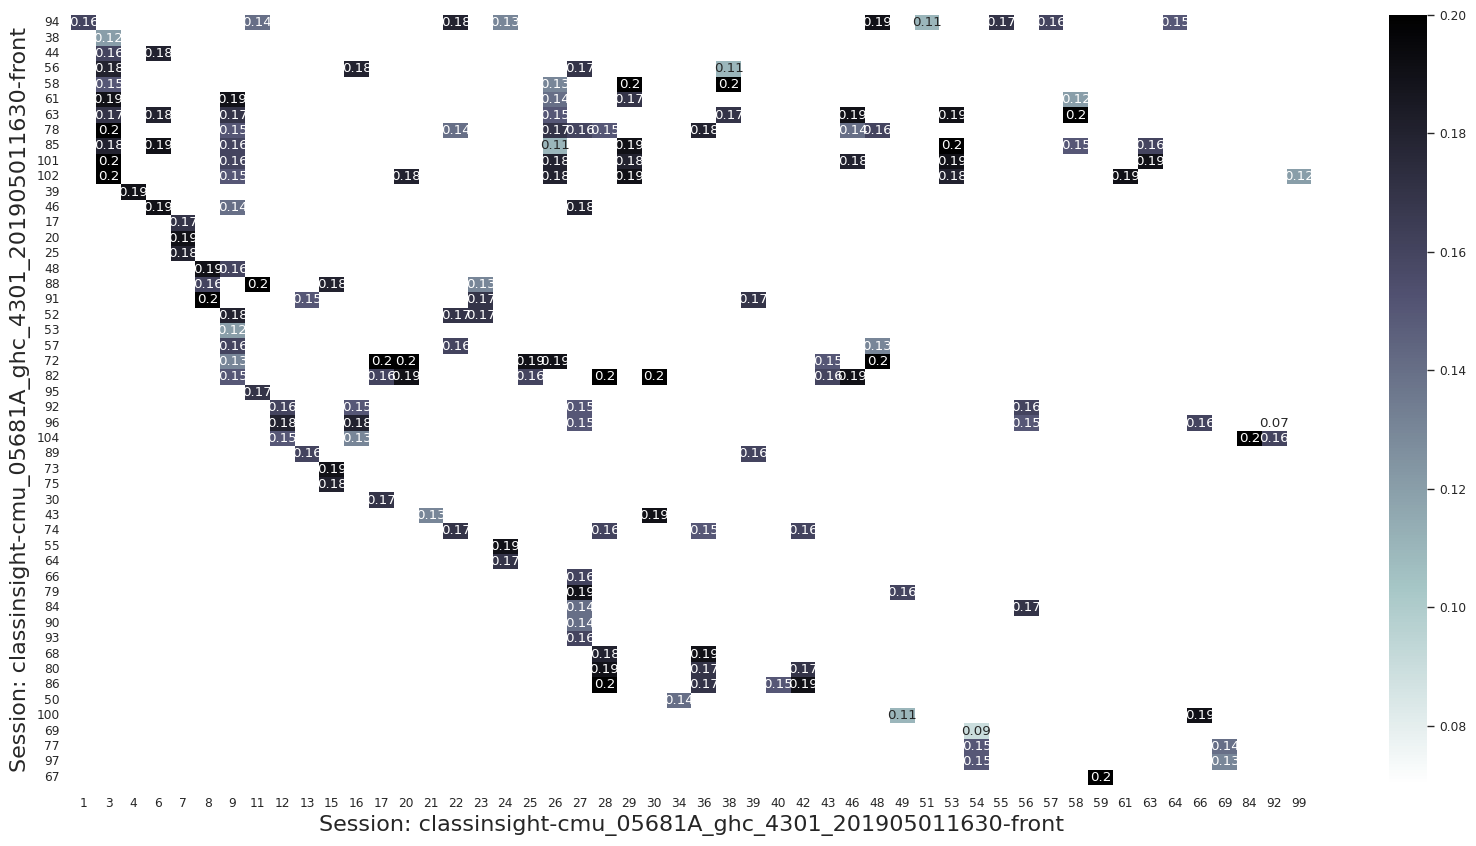

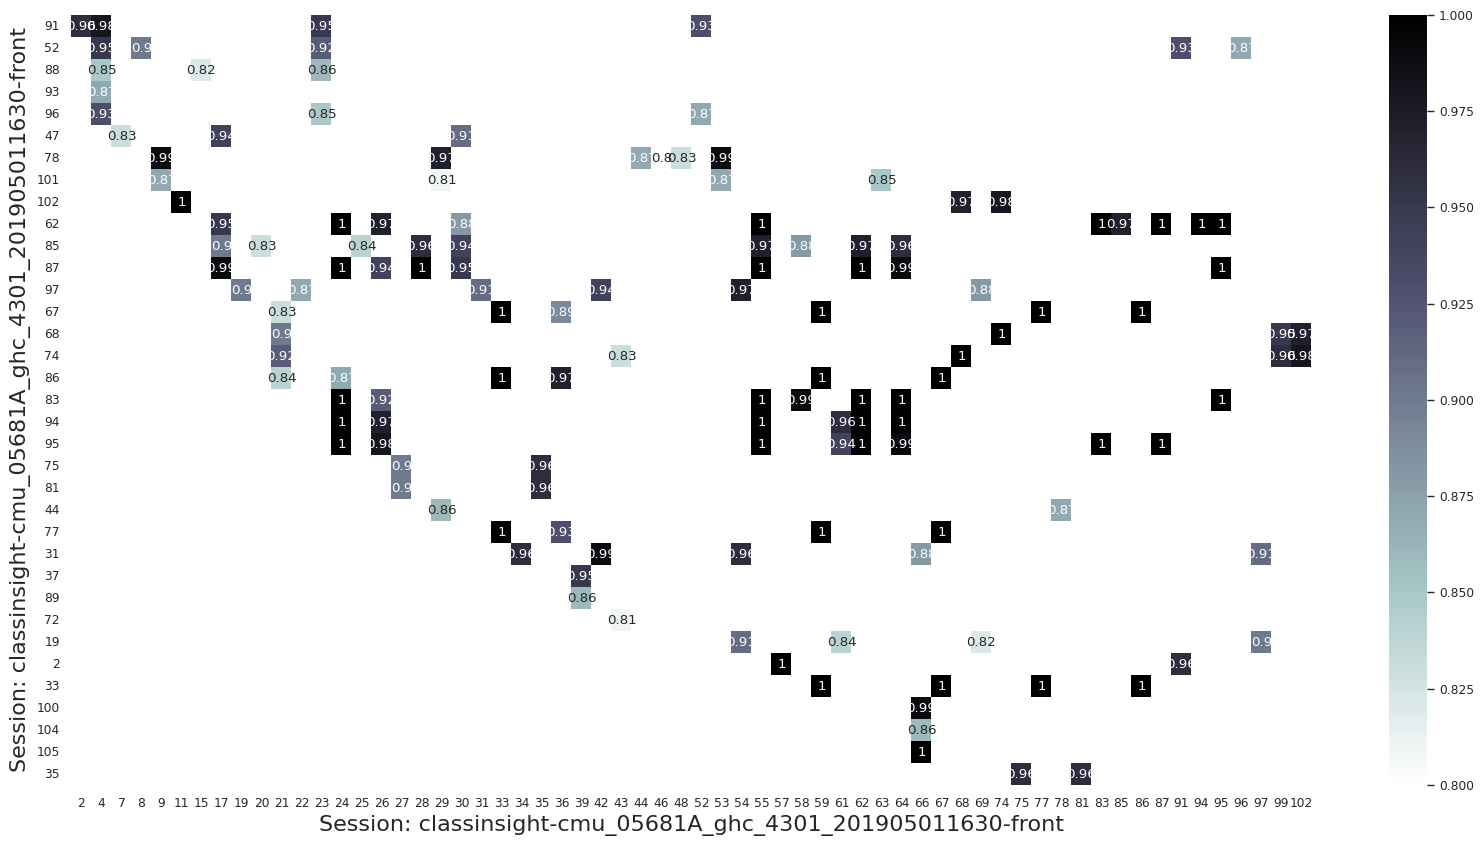

In [8]:
CLU_EPS = 0.4
CLU_MIN_PTS = 100
MATCH_DISTANCE_THRESHOLD = 0.2
BBOX_OVERLAP_THRESHOLD = 0.8

for course_idx, course in enumerate(frame_file_data):
    for session_idx, session_id in enumerate(frame_file_data[course]):
        if session_id.split("-front")[0] not in session_filter_list:
            print(f"Session {session_id} not in session filter list, skipping...")
            continue
        embmatch_map_cache_file = f"{embmatched_id_map_data_dir}/{session_id}.csv"
        try:
            if not os.path.exists(embmatch_map_cache_file):
                session_emb_info = pickle.load(open(f'{emb_analysis_session_data}/{session_id}.pb','rb'))
                session_id_map = pickle.load(open(f"{postprocessed_id_map_data_dir}/{session_id}.pb","rb"))
                df_tracking_new = pickle.load(open(f"{track_analysis_session_data}/{session_id}.pb","rb")).transpose()
        
                printm("## Replace raw ids with mapped ids for given session")
                session_emb_info = {
                    xr:{
                        session_id_map[yr]:session_emb_info[xr][yr] 
                            for yr in session_emb_info[xr] if not (session_id_map[yr]==10000)} for xr in session_emb_info}
                
                # arrange info as per new tracking id for entire session
                printm("## arrange info as per new tracking id for entire session")
                gaze_info = {}
                emb_info = {}
                bbox_info = {}
                
                for frame_number in session_emb_info:
                    for trackId in session_emb_info[frame_number]:
                        if trackId not in gaze_info:
                            gaze_info[trackId] = []
                            emb_info[trackId]=[]
                            bbox_info[trackId] = []
                        # get  gaze info
                        try:
                            id_bbox = session_emb_info[frame_number][trackId]['bbox']
                            bbox_info[trackId].append([frame_number]+list(id_bbox))
                            pitch, roll, yaw= session_emb_info[frame_number][trackId]['rvec'][0]
                            pitch, roll, yaw=np.rad2deg(pitch), np.rad2deg(roll), np.rad2deg(yaw)
                            gaze_sx, gaze_sy, gaze_ex, gaze_ey = session_emb_info[frame_number][trackId]['gaze_2d'][0].flatten()
                            gaze_info[trackId].append([frame_number, pitch, roll, yaw, gaze_sx, gaze_sy, gaze_ex, gaze_ey])
                            face_emb = session_emb_info[frame_number][trackId]['face_embedding'].tolist()
                            emb_info[trackId].append([frame_number]+face_emb)
                        except:
                            continue
                
                for id in gaze_info:
                    gaze_info[id] = pd.DataFrame(gaze_info[id], columns=['frame','pitch','roll','yaw','gaze_sx', 'gaze_sy', 'gaze_ex', 'gaze_ey']).set_index('frame')
                    emb_info[id] =pd.DataFrame(emb_info[id], columns=['frame']+np.arange(512).tolist()).set_index('frame')
                    bbox_info[id] = pd.DataFrame(bbox_info[id], columns=['frame']+np.arange(5).tolist()).set_index('frame')
                
                
                # Get id start stop for given session (needed to evaluate overlap conditions)
                printm("## Get id start stop for given session (needed to evaluate overlap conditions)")
                total_idxs = df_tracking_new.index.max()
                for old_id in session_id_map:
                    new_id = session_id_map[old_id]
                    if not new_id==10000:
                        new_id_col = f'N{new_id}'
                        if new_id_col not in df_tracking_new:
                            df_tracking_new[new_id_col] = None
                        df_tracking_new[new_id_col] =  df_tracking_new[new_id_col].where(~df_tracking_new[new_id_col].isnull(), df_tracking_new[old_id])
                    df_tracking_new = df_tracking_new.drop(old_id, axis=1)
                
                col_start_stop_idxs = []
                for col in df_tracking_new.columns:
                    one_idxs = df_tracking_new.index[np.where(df_tracking_new[col]==1)[0]].values
                    col_start_stop_idxs.append([col, one_idxs.min(), one_idxs.max()])
                df_id_start_stop = pd.DataFrame(col_start_stop_idxs, columns=['id','min_idx','max_idx'])
                df_id_start_stop['total_idxs'] = df_id_start_stop['max_idx']-df_id_start_stop['min_idx']
                df_id_start_stop['id'] = df_id_start_stop['id'].apply(lambda x: int(x[1:]))
        
                # Use spectral clustering to get clean set of embeddings and calculate their centroid
                printm("## Use spectral clustering to get clean set of embeddings and calculate their centroid")
                np.random.seed(42)
                clustered_median_emb = {}
                for id in emb_info:
                    emb_clu = DBSCAN(min_samples=CLU_MIN_PTS, eps=CLU_EPS)
                    try:
                        emb_clu.fit(emb_info[id].values)
                    except:
                        emb_clu=None
                    if (emb_clu is None) or (max(emb_clu.labels_)<0):
                        sprint(f"All frames are outliers, not proceeding with id {id}")
                        continue
                    best_cluster_id = pd.Series(emb_clu.labels_[emb_clu.labels_>=0]).value_counts().index[0]
                    frames = emb_info[id].iloc[emb_clu.labels_==best_cluster_id].index.values
                    clustered_median_emb[id] = np.median(emb_info[id].loc[frames],axis=0)
        
                # Evaluate matching distance for temporally non overlapping ids
                printm("## Evaluate matching distance for temporally non overlapping ids")
                match_scores = {}
                for idA in sorted(clustered_median_emb.keys()):
                    for idB in sorted(clustered_median_emb.keys()):
                        if idB in match_scores.keys():
                            continue
                        # check if idA and idB overlaps, if not, Just leave them be
                        min_idxA, max_idxA = df_id_start_stop[df_id_start_stop['id']==idA][['min_idx','max_idx']].values[0].tolist()
                        min_idxB, max_idxB = df_id_start_stop[df_id_start_stop['id']==idB][['min_idx','max_idx']].values[0].tolist()
                        if len(range(max(min_idxA,min_idxB), min(max_idxA,max_idxB))) > 150:#more than 10 seconds of overlap
                            #overlapping ranges
                            continue
                        match_distance = cdist(clustered_median_emb[idA].reshape(1,-1), clustered_median_emb[idB].reshape(1,-1))[0][0]
                        if match_distance < MATCH_DISTANCE_THRESHOLD:
                            if idA not in match_scores:
                                match_scores[idA] = {}
                            match_scores[idA][idB] = match_distance
                        
                df_matching_method = pd.DataFrame(match_scores)
                if df_matching_method.shape[0]>0:
                    fig, axn = plt.subplots(1,1,figsize=(20,10))
                    sns.heatmap(df_matching_method.round(2), annot=True,ax=axn,cmap='bone_r')
                    axn.set_xlabel(f"Session: {session_id}",fontsize=16)
                    axn.set_ylabel(f"Session: {session_id}",fontsize=16)
                    plt.savefig(f'plots/self_match_{course}_{session_id.split("-front")[0].split("_")[-1]}.png',dpi=400,bbox_inches='tight')
                
        
                # Evaluate bbox overlap to filter out spatially overlapping ids
                printm("## Evaluate bbox overlap to filter out spatially overlapping ids")
                overlap_scores = {}
                for idA in sorted(clustered_median_emb.keys()):
                    for idB in sorted(clustered_median_emb.keys()):
                        if idB in match_scores.keys():
                            continue
                        # check if idA and idB overlaps, if not, Just leave them be
                        min_idxA, max_idxA = df_id_start_stop[df_id_start_stop['id']==idA][['min_idx','max_idx']].values[0].tolist()
                        min_idxB, max_idxB = df_id_start_stop[df_id_start_stop['id']==idB][['min_idx','max_idx']].values[0].tolist()
                        if len(range(max(min_idxA,min_idxB), min(max_idxA,max_idxB))) > 0:
                            #overlapping ranges
                            continue
                        bbox_overlap_matrix = cdist(bbox_info[idA].iloc[:1000], bbox_info[idB].iloc[:1000], metric = is_overlapping_metric)
                        bbox_overlap = np.mean(bbox_overlap_matrix.flatten())
                        sprint(idA, idB, bbox_overlap)
                        if bbox_overlap > BBOX_OVERLAP_THRESHOLD:
                            if idA not in overlap_scores:
                                overlap_scores[idA] = {}
                            overlap_scores[idA][idB] = bbox_overlap
                        
                df_overlap = pd.DataFrame(overlap_scores)

                    
                if df_overlap.shape[0]>0:
                    fig, axn = plt.subplots(1,1,figsize=(20,10))
                    sns.heatmap(df_overlap.round(2), annot=True,ax=axn,cmap='bone_r')
                    axn.set_xlabel(f"Session: {session_id}",fontsize=16)
                    axn.set_ylabel(f"Session: {session_id}",fontsize=16)
                    plt.savefig(f'plots/self_overlap_{course}_{session_id.split("-front")[0].split("_")[-1]}.png',dpi=400,bbox_inches='tight')
        
                # get eligible pairs from matching and spatial overlap information
                printm("## get eligible pairs from matching and spatial overlap information")
                if (df_matching_method.shape[0]==0) or (df_overlap.shape[0]==0):
                    df_eligible_pairs = pd.DataFrame(columns=["id_pair","value_overlap","value_match"])
                else:
                    df_overlap_melted = df_overlap.reset_index().melt(id_vars='index')
                    df_overlap_melted = df_overlap_melted[~df_overlap_melted['value'].isnull()]
                    df_overlap_melted['id_pair'] = df_overlap_melted.apply(lambda row: tuple(sorted([int(row['index']),int(row['variable'])])), axis=1)
                    df_overlap_melted = df_overlap_melted[['id_pair','value']]
                    df_overlap_melted
                    
                    df_match_melted = df_matching_method.reset_index().melt(id_vars='index')
                    df_match_melted = df_match_melted[~df_match_melted['value'].isnull()]
                    df_match_melted['id_pair'] = df_match_melted.apply(lambda row: tuple(sorted([int(row['index']),int(row['variable'])])), axis=1)
                    df_match_melted = df_match_melted[['id_pair','value']]
                    df_match_melted
                    
                    df_eligible_pairs = pd.merge(df_overlap_melted, df_match_melted, on='id_pair',suffixes=('_overlap','_match'))
                df_eligible_pairs.to_csv(embmatch_map_cache_file,index=False)
        
                embmatch_raw_data_dict = {
                    'overlap_df':df_overlap,
                    'match_df':df_matching_method,
                    'eligible_pairs_df':df_eligible_pairs,
                    'id_session_embeddings':clustered_median_emb,
                    'id_start_stop_df':df_id_start_stop
                }
                pickle.dump(embmatch_raw_data_dict, open(f"{embmatched_id_raw_data_dir}/{session_id}.pb","wb"))
                printm(f"## Got embedding based id match for session: {course_idx}-{course}, session:{session_idx}-{session_id}")
                print(f"{df_eligible_pairs.id_pair.values}")
            else:
                print(f"FILE EXISTS: embedding based id match for session: {course_idx}-{course}, session:{session_idx}-{session_id}")
        except:
            printm(f"# ERROR: Unable to get embedding based id match for: {course_idx}-{course}, session:{session_idx}-{session_id}")
            print(traceback.format_exc())
            time.sleep(5)
        printm(f"# -----------------")
    
